Camera coordinates in world:
 [[-0.64278761 -0.76604444  0.          2.        ]
 [ 0.71984631 -0.60402277 -0.34202014  2.47705772]
 [ 0.26200263 -0.21984631  0.93969262  1.96575305]
 [ 0.          0.          0.          1.        ]]
World coordinates in camera:
 [[-0.64278761  0.71984631  0.26200263 -1.01255811]
 [-0.76604444 -0.60402277 -0.21984631  3.46045172]
 [ 0.         -0.34202014  0.93969262 -1.        ]
 [ 0.          0.          0.          1.        ]]
Object position in the world space:
 [[2.]
 [3.]
 [4.]
 [1.]]
Object position in the camera space:
 [[ 0.90941612]
 [-0.76309073]
 [ 1.73271005]]


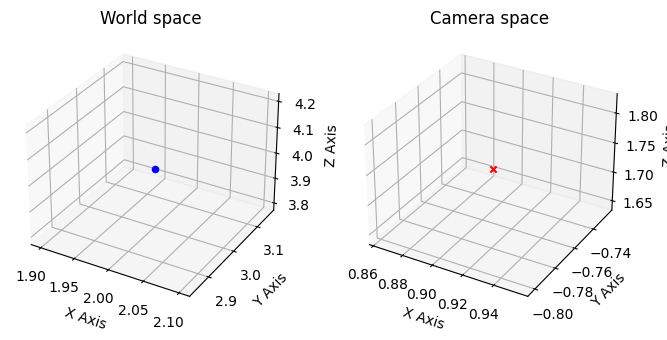

In [7]:
# Name: Gaurang Ruparelia

import matplotlib.pyplot as plt
import numpy as np

def get_transformation_matrix_inverse(transformation_matrix):
    new_T = np.identity(4)
    
    rotation_matrix = transformation_matrix[0:3,0:3]
    new_T[:3, :3] = rotation_matrix.T
    
    position_vector = transformation_matrix[:,3]
    
    new_T[:3, 3] = -rotation_matrix.T @ position_vector[0:3]
    
    return new_T

# In the beginning, the camera's local coordinate system coincides with the world coordinate system.
initial_camera_transformation = np.identity(4, dtype=np.float32)

# First rotate the camera around the z axis by 130 degrees, then move it by a translation of (dx, dy, dz) = (2.0, 3.0, 1.0), finally rotate it around the x axis by 20 degrees.
alpha = np.deg2rad(130)
rotation1 = np.array([
    [np.cos(alpha), -np.sin(alpha), 0, 0],
    [np.sin(alpha), np.cos(alpha), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

translation = np.array([
    [1, 0, 0, 2],
    [0, 1, 0, 3],
    [0, 0, 1, 1],
    [0, 0, 0, 1]
])

beta = np.deg2rad(20)
rotation2 = np.array([
    [1, 0, 0, 0],
    [0, np.cos(beta), -np.sin(beta), 0],
    [0, np.sin(beta), np.cos(beta), 0],
    [0, 0, 0, 1]
])

T_in_world_camera = rotation2 @ translation @ rotation1 @ initial_camera_transformation
T_in_camera_world = get_transformation_matrix_inverse(T_in_world_camera)

print("Camera coordinates in world:\n", T_in_world_camera)
print("World coordinates in camera:\n", T_in_camera_world)

# Object position in the world space.
object_position_world = np.array([[2], [3], [4], [1]], dtype=np.float32)

print("Object position in the world space:\n", object_position_world)

object_position_camera = T_in_camera_world @ object_position_world

object_position_camera = object_position_camera[:3]

print("Object position in the camera space:\n", object_position_camera)

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("World space")
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("Camera space")
ax1.scatter(*object_position_world, color='blue', marker='o')
ax2.scatter(*object_position_camera, color='red', marker='x')

ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")
ax2.set_xlabel("X Axis")
ax2.set_ylabel("Y Axis")
ax2.set_zlabel("Z Axis")
plt.show()